In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
profiles = pd.read_csv('../../merge/data_with_features.txt', sep='\t')
profiles = profiles[(profiles['tumor_fraction']>=0.1) & (profiles['ulp_wgs_coverage']>=0.1) & (profiles['merged_updated_ER_status_binary']!='none') & (profiles['sample'].str.contains('ULP'))]
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

color_dict = {'+':'tab:blue', '-':'tab:orange'}

In [3]:
len(profiles['sample'].unique())

191

+ 99
- 92
+ 99
- 92
+ 99
- 92


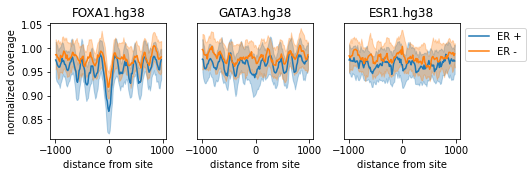

In [5]:
fig,axes = plt.subplots(1,3,figsize = (8,2.5),sharey = True)

for i,site_name in enumerate(['FOXA1.hg38','GATA3.hg38','ESR1.hg38']):
    ax = axes[i]
    for subtype in ['+','-']:
        current = profiles[(profiles['site_name']==site_name) & (profiles['merged_updated_ER_status_binary']==subtype)]
        print(subtype,len(current))
        ax.plot(plot_columns,current[str_plot_columns].median(), color = color_dict[subtype], label = 'ER '+subtype)
        ax.fill_between(plot_columns,np.percentile(current[str_plot_columns],25, axis=0),np.percentile(current[str_plot_columns],75, axis=0), color = color_dict[subtype], alpha = 0.3)
    ax.set_title(site_name)
    ax.set_xlabel('distance from site')
    
for ax in axes:
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    
axes[1].tick_params(left=False)   
axes[2].tick_params(left=False)   
axes[0].set_ylabel('normalized coverage')

fig.tight_layout()
fig.subplots_adjust(wspace = -.3)
axes[2].legend(bbox_to_anchor = [1,1],loc = 'upper left')

fig.savefig('plots/cov_profiles.pdf')

FOXA1.hg38
+ 99
ER+ Pearson r=-0.52, p=4.1e-08
- 92
ER- Pearson r=-0.02, p=8.8e-01


GATA3.hg38
+ 99
ER+ Pearson r=-0.44, p=5.7e-06
- 92
ER- Pearson r=0.14, p=1.8e-01


ESR1.hg38
+ 99
ER+ Pearson r=-0.35, p=4.2e-04
- 92
ER- Pearson r=0.02, p=8.7e-01




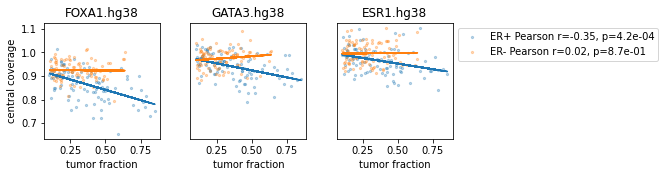

In [7]:
fig,axes = plt.subplots(1,3,figsize = (8,2.5),sharey = True)
for i,site_name in enumerate(['FOXA1.hg38','GATA3.hg38','ESR1.hg38']):
    ax = axes[i]
    print(site_name)
    for subtype in ['+','-']:
        current = profiles[(profiles['site_name']==site_name) & (profiles['merged_updated_ER_status_binary']==subtype)]
        print(subtype,len(current))
        lin_reg_slope, lin_reg_intercept, pearson_r, pearson_p, lin_reg_std_err = linregress(current['tumor_fraction'],current['central_cov'])
        
        best_fit = lin_reg_slope*current['tumor_fraction'] + lin_reg_intercept
        ax.plot(current['tumor_fraction'],best_fit)
        label = 'ER'+subtype+' Pearson r='+str(np.round(pearson_r,2))+', p='+str(format(pearson_p,'.1e'))
        print(label)
        ax.scatter(current['tumor_fraction'],current['central_cov'], color = color_dict[subtype], label = label, alpha = 0.3, s = 5)
    
    #ax.legend(bbox_to_anchor = [-.1,0],loc = 'upper left')
    ax.set_title(site_name)
    ax.set_xlabel('tumor fraction')
    print('\n')
    
for ax in axes:
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    
axes[1].tick_params(left=False)   
axes[2].tick_params(left=False)   
axes[0].set_ylabel('central coverage')    

fig.tight_layout()
fig.subplots_adjust(wspace = -.35)
axes[2].legend(bbox_to_anchor = [1,1],loc = 'upper left')

fig.savefig('plots/correlations.pdf')